In [24]:
import os
import re
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('./pa1_2/pa1_2.csv')


In [25]:
wide_core_num = df['Wide Core'].to_numpy()
wide_core_l2size = df['L2 Size'].to_numpy()
wide_core_num = wide_core_num[~np.isnan(wide_core_num)]
wide_core_l2size = wide_core_l2size[~np.isnan(wide_core_l2size)]

narrow_core_num = df['Narrow Core'].to_numpy()
narrow_core_l2size = df['L2 Size.1'].to_numpy()

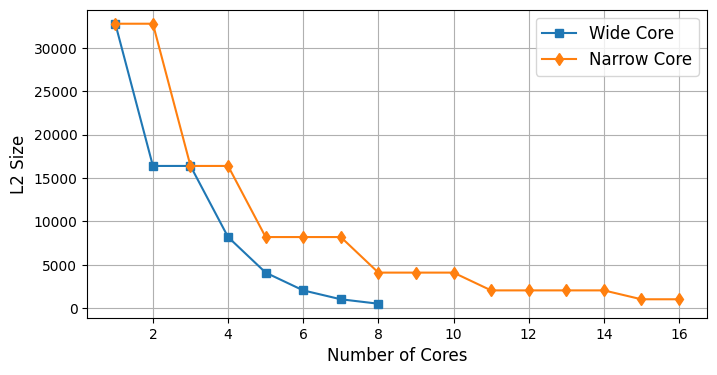

In [26]:
# [1] Plot latency
plt.figure(figsize=(8,4))
plt.plot(wide_core_num, wide_core_l2size, marker='s', label='Wide Core')
plt.plot(narrow_core_num, narrow_core_l2size, marker='d', label='Narrow Core')
plt.xlabel('Number of Cores', fontsize = 12)
plt.ylabel('L2 Size', fontsize = 12)
plt.legend(fontsize = 12)
plt.grid()
plt.savefig('./figures/pa1-2a.png', bbox_inches='tight')


In [27]:
test_cases  = ['narrow', 'wide']
target_file = "stats.txt"
energy      = r"Total energy \(J\)\s*:\s*([0-9.eE+-]+)"
latency     = r"Time \(s\)\s*:\s*([0-9.eE+-]+)"
num_core    = r"Cores\s*:\s*([0-9]+)"


In [28]:
# get latency and energy
latency_all = []
energy_all  = []
core_all    = []

for t in range(len(test_cases)):
    prefix = 'blackscholes_' + test_cases[t]
    pattern = f"./pa1_2/{prefix}*/"
    folders = [d for d in glob.glob(pattern) if os.path.isdir(d)]
    latency_case_ = []
    energy_case_  = []
    core_case_    = []
    for folder in folders:
        file_path = os.path.join(folder, target_file)
        if not os.path.exists(file_path):
            print(f"Missing: {file_path}")
            continue

        with open(file_path, "r") as f:
            for line in f:
                match = re.search(num_core, line)
                if match:
                    value = float(match.group(1))
                    # print(f"{folder}: {value}")
                    core_case_.append(value)
                    break
            for line in f:
                match = re.search(latency, line)
                if match:
                    value = float(match.group(1))
                    # print(f"{folder}: {value}")
                    latency_case_.append(value)
                    break
            for line in f:
                match = re.search(energy, line)
                if match:
                    value = float(match.group(1))
                    # print(f"{folder}: {value}")
                    energy_case_.append(value)
                    break
            
    latency_all.append(latency_case_)
    energy_all.append(energy_case_)
    core_all.append(core_case_)

(np.float64(4.0563529411764705), np.float64(2.0281882352941176), np.float64(1.3490117647058824), np.float64(1.0118647058823529), np.float64(0.8054235294117648), np.float64(0.6712764705882353), np.float64(0.5755176470588236), np.float64(0.5033588235294117), np.float64(0.4475176470588235), np.float64(0.40288235294117647), np.float64(0.3657529411764706), np.float64(0.33538235294117646), np.float64(0.30968823529411765), np.float64(0.28761764705882353), np.float64(0.26876470588235296), np.float64(0.2519705882352941))
(np.float64(2.782535294117647), np.float64(1.390205882352941), np.float64(0.9327), np.float64(0.7048294117647059), np.float64(0.5679), np.float64(0.4744764705882353), np.float64(0.4074529411764706), np.float64(0.35607058823529414))


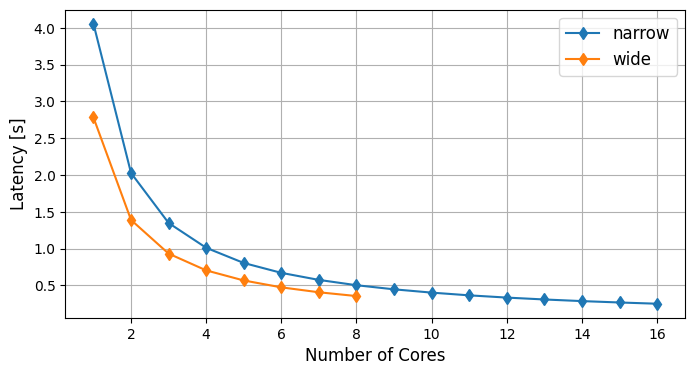

In [33]:
# [1] Plot latency
plt.figure(figsize=(8,4))
for n in range(2):
    core_n      = np.array(core_all[n])
    latency_n   = np.array(latency_all[n])
    sorted_data = sorted(zip(core_n, latency_n))
    sorted_core_n, sorted_latency_n = zip(*sorted_data)
    print(sorted_latency_n)
    plt.plot(sorted_core_n, sorted_latency_n, marker='d', label=test_cases[n])
plt.xlabel('Number of Cores', fontsize = 12)
plt.ylabel('Latency [s]', fontsize = 12)
plt.legend(fontsize = 12)
plt.grid()
plt.savefig('./figures/pa1-2b-latency.png', bbox_inches='tight')


(np.float64(199.68208800415164), np.float64(173.67702094343176), np.float64(94.04067784316467), np.float64(89.44611017230629), np.float64(55.695812912677155), np.float64(53.53542044092642), np.float64(52.86716946863312), np.float64(30.561116285284236), np.float64(30.0832647181073), np.float64(29.404037375483362), np.float64(19.631729565152988), np.float64(19.201950736885397), np.float64(18.9756960254152), np.float64(18.653070616552757), np.float64(13.448530691447537), np.float64(13.224462634372559))
(np.float64(146.64544533338292), np.float64(77.82833379987176), np.float64(73.53628411659415), np.float64(48.79313370982041), np.float64(32.4165653479626), np.float64(24.23797992173675), np.float64(19.845469873110076), np.float64(17.31355390280898))


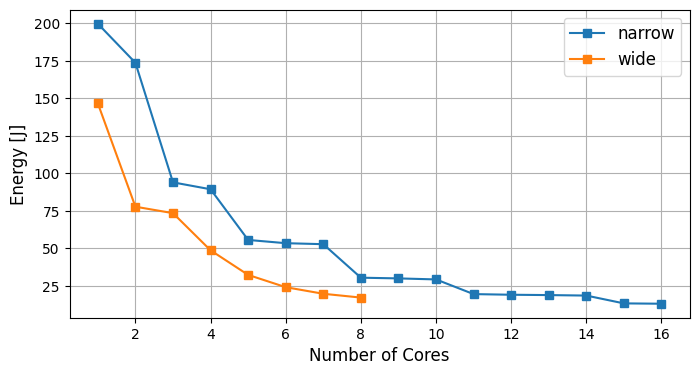

In [35]:
# [4] Plot energy
plt.figure(figsize=(8,4))
for n in range(2):
    core_n      = np.array(core_all[n])
    energy_n   = np.array(energy_all[n])
    sorted_data = sorted(zip(core_n, energy_n))
    sorted_core_n, sorted_energy_n = zip(*sorted_data)
    plt.plot(sorted_core_n, sorted_energy_n, marker='s', label=test_cases[n])
    print(sorted_energy_n)
plt.xlabel('Number of Cores', fontsize = 12)
plt.ylabel('Energy [J]', fontsize = 12)
plt.legend(fontsize = 12)
plt.grid()
plt.savefig('./figures/pa1-2b-energy.png', bbox_inches='tight')
